<a href="https://colab.research.google.com/github/Darshan2082002/Machine_learning_projects/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()
y = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df = df.drop(columns=['Attrition', 'EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'])

categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

X = df

print("Features (X) head:")
print(X.head())
print("\nTarget (y) head:")
print(y.head())

Features (X) head:
   Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   
3   33       1392                 3          4                        4   
4   27        591                 2          1                        1   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  ...  \
0          94               3         2                4           5993  ...   
1          61               2         2                2           5130  ...   
2          92               2         1                3           2090  ...   
3          56               3         1                3           2909  ...   
4          40               3         1                2           3468  ...   

   JobRole_Laboratory Technician  JobRole_Manager

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dtc.fit(X, y)

print("Decision Tree Classifier trained successfully.")

Decision Tree Classifier trained successfully.


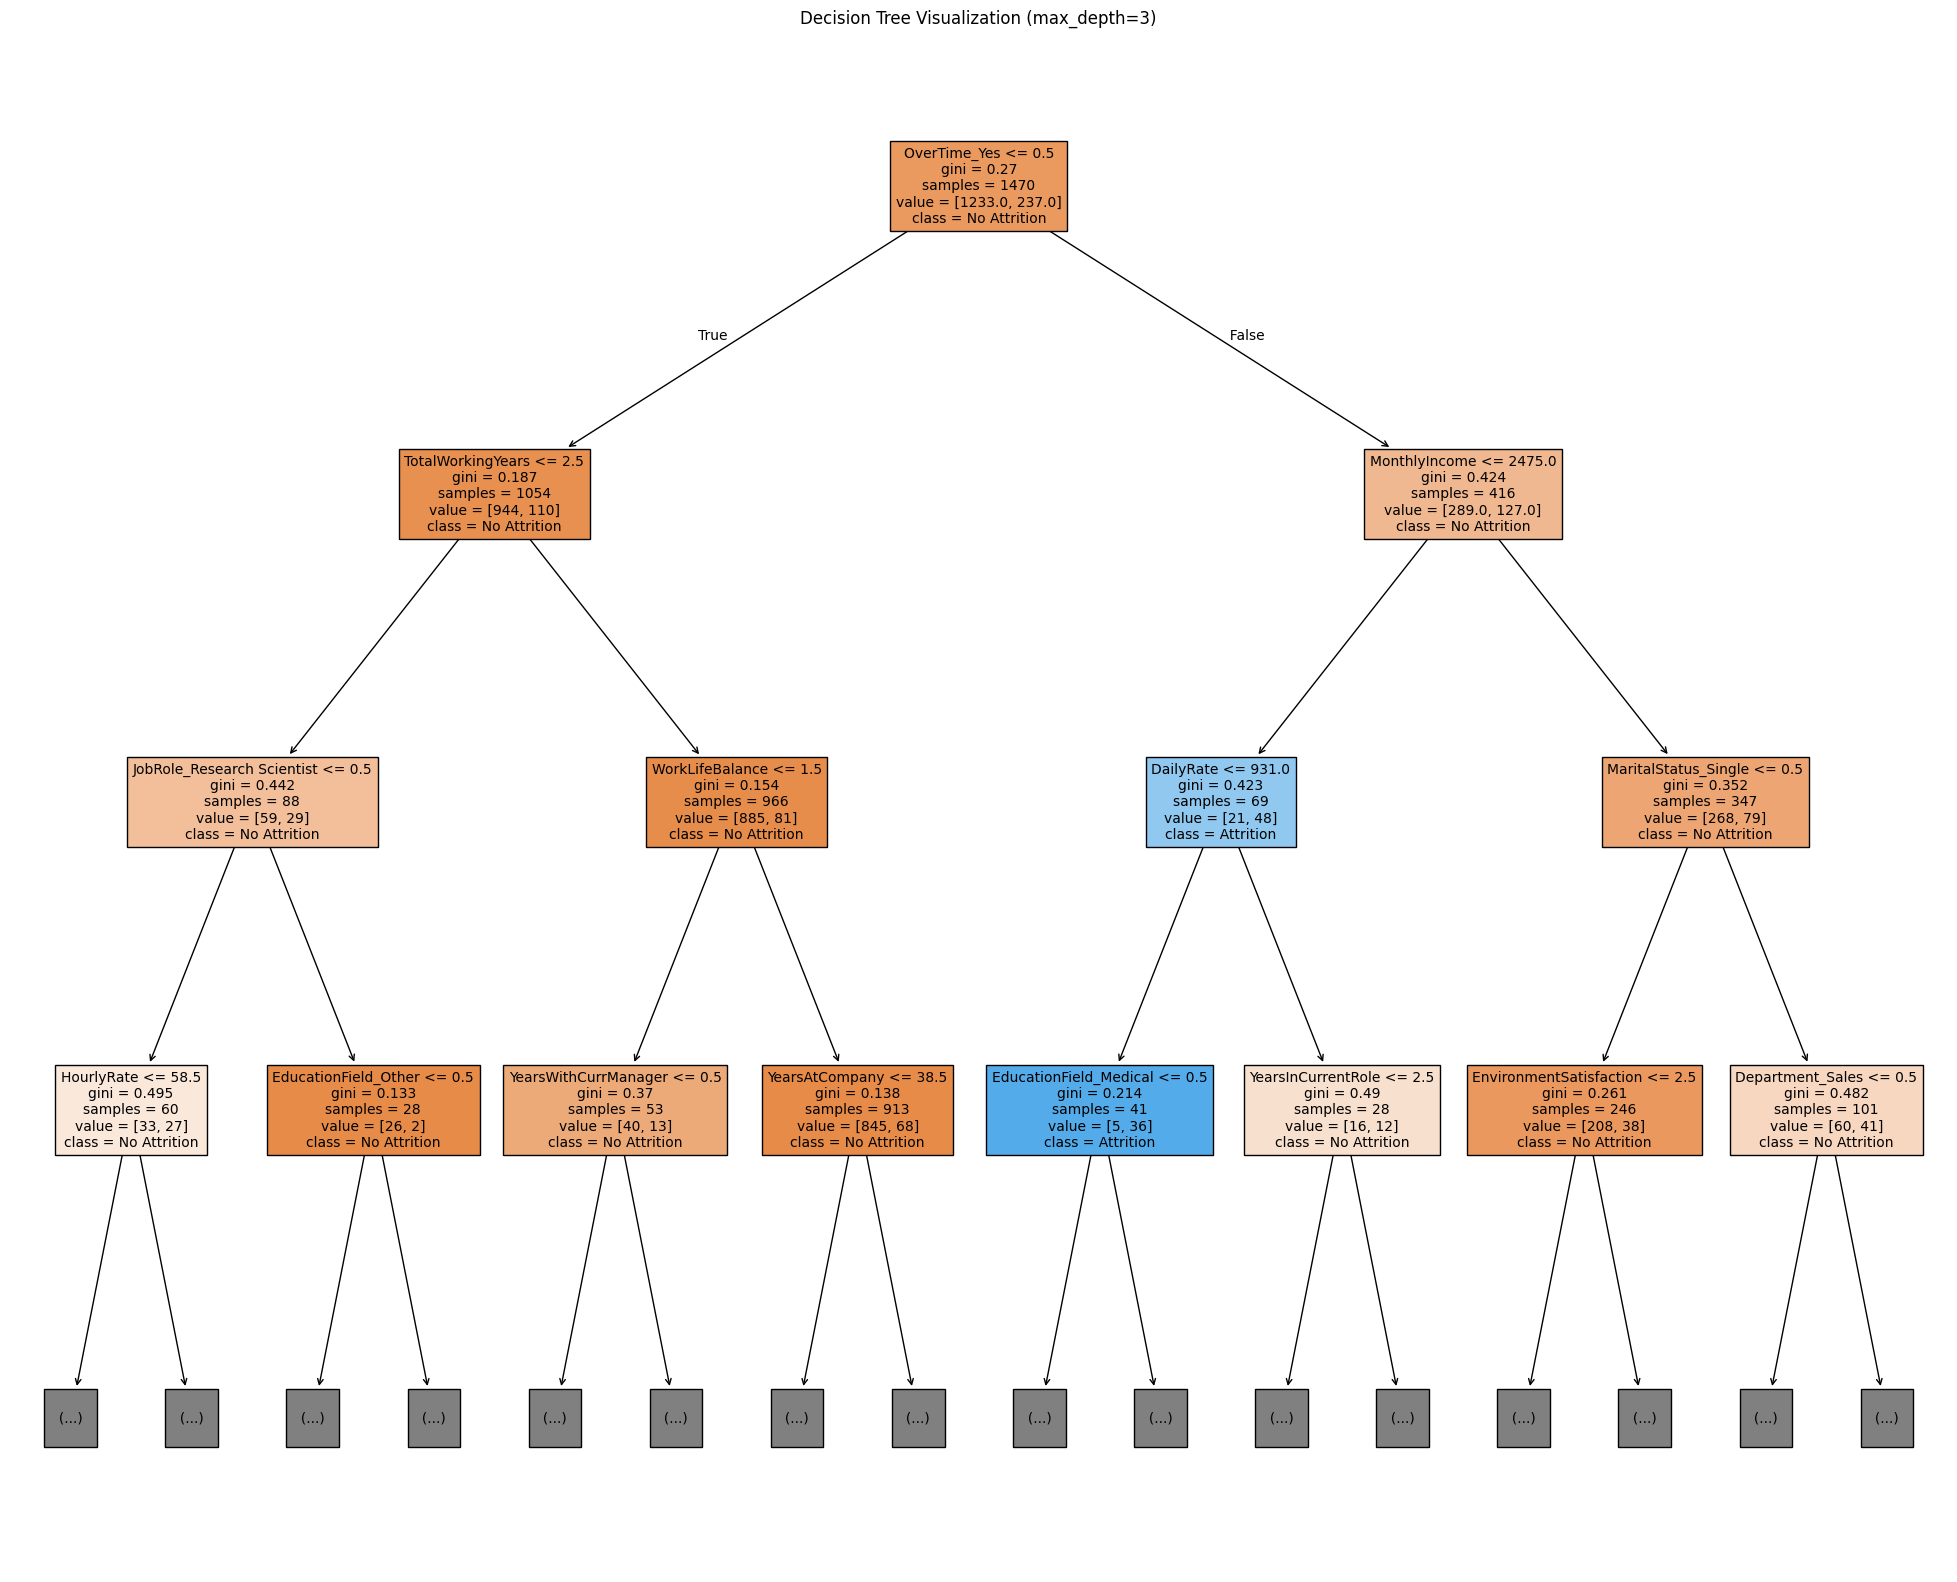

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(25,20))
plot_tree(dtc, filled=True, feature_names=X.columns.tolist(), class_names=['No Attrition', 'Attrition'], max_depth=3, fontsize=10)
plt.title("Decision Tree Visualization (max_depth=3)")
plt.show()

Top 10 Most Important Features:
                    Feature  Importance
9             MonthlyIncome    0.134301
5                HourlyRate    0.081786
0                       Age    0.062891
43             OverTime_Yes    0.060574
1                 DailyRate    0.054306
10              MonthlyRate    0.052369
21  YearsSinceLastPromotion    0.049549
16        TotalWorkingYears    0.047255
11       NumCompaniesWorked    0.043719
4   EnvironmentSatisfaction    0.038646


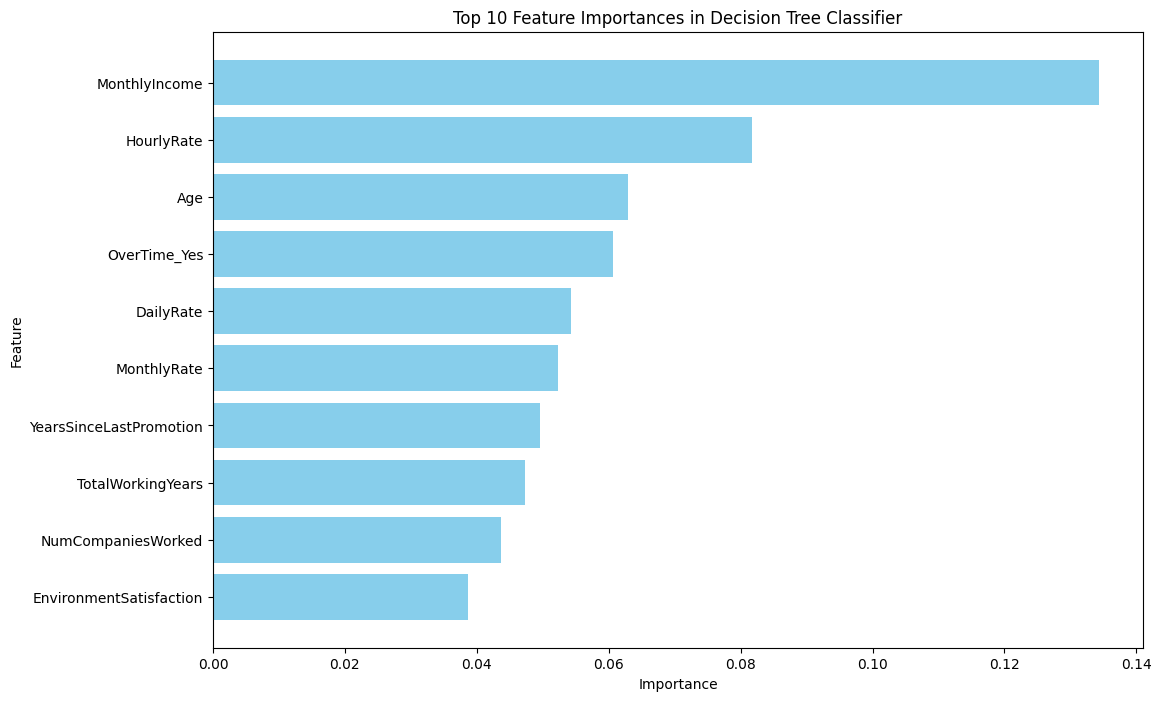

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the model
feature_importances = dtc.feature_importances_

# Create a DataFrame to associate features with their importances
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# Display the top N most important features
print("Top 10 Most Important Features:")
print(features_df.head(10))

# Optionally, visualize feature importances
plt.figure(figsize=(12, 8))
plt.barh(features_df['Feature'].head(10), features_df['Importance'].head(10), color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances in Decision Tree Classifier')
plt.gca().invert_yaxis() # To have the most important feature at the top
plt.show()